In [7]:
from keras.layers import Input,Lambda ,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import tensorflow as tf
import os
import pickle


In [8]:
IMAGE_SIZE=[224,224]
    

In [9]:
train_path='./images/'

In [10]:
curr_y=0
n_dict={}
for name in os.listdir(train_path):
    if name not in n_dict:
        n_dict[name]=curr_y
        curr_y+=1

In [11]:
n_dict

{'kushagra': 0, 'priyanshu': 1, 'rahul': 2, 'vishal_gorai': 3}

In [12]:
with open('labels.pickle','wb') as f:
    pickle.dump(n_dict,f)

In [4]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [5]:
for layer in vgg.layers:
    layer.trainable=False
    

In [6]:
folder=glob('images/*')

In [7]:
x=Flatten()(vgg.output)
prediction=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
optimizer=tf.train.AdamOptimizer(0.00006)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
from keras.preprocessing.image import ImageDataGenerator


In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [11]:
training_set=train_datagen.flow_from_directory('./images',target_size=(224,224),batch_size=32,class_mode='categorical')


Found 44 images belonging to 4 classes.


In [12]:
test_set=test_datagen.flow_from_directory('./test_images',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 16 images belonging to 4 classes.


In [13]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=6,steps_per_epoch=len(training_set),validation_steps=len(test_set))



Epoch 1/6
2/2 [==============================] - 11s 6s/step - loss: 2.2534 - accuracy: 0.1818 - val_loss: 1.8389 - val_accuracy: 0.2500
Epoch 2/6
2/2 [==============================] - 1s 352ms/step - loss: 1.4436 - accuracy: 0.5909 - val_loss: 0.8925 - val_accuracy: 0.5000
Epoch 3/6
2/2 [==============================] - 2s 913ms/step - loss: 0.8829 - accuracy: 0.7045 - val_loss: 0.8477 - val_accuracy: 0.7500
Epoch 4/6
2/2 [==============================] - 2s 1s/step - loss: 0.5252 - accuracy: 0.8409 - val_loss: 0.4465 - val_accuracy: 0.8125
Epoch 5/6
2/2 [==============================] - 2s 858ms/step - loss: 0.2196 - accuracy: 0.9545 - val_loss: 0.2436 - val_accuracy: 0.8750
Epoch 6/6
2/2 [==============================] - 2s 1s/step - loss: 0.1138 - accuracy: 0.9773 - val_loss: 0.1699 - val_accuracy: 1.0000


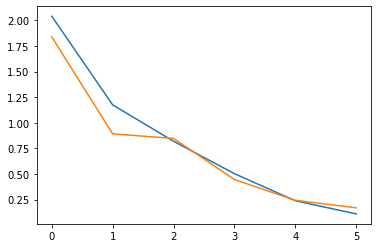

In [16]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'])

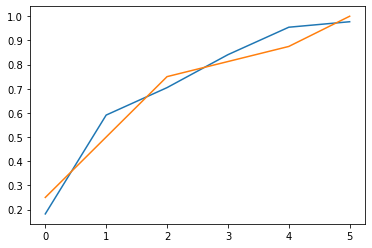

In [17]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [18]:
from keras.models import load_model
model.save('facefeatures_new_model.h5')